In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241212_145945.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241212_145945.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0   337594  1.734012e+09 -0.139745  0.027730  0.227851   
 1             0   337595  1.734012e+09 -0.135982  0.028291  0.227017   
 2             0   337596  1.734012e+09 -0.133746  0.029170  0.225395   
 3             0   337597  1.734012e+09 -0.131960  0.030345  0.223647   
 4             0   337598  1.734012e+09 -0.130246  0.031660  0.222073   
 ...         ...      ...           ...       ...       ...       ...   
 2888631   25231  8020335  1.734089e+09  0.031399 -0.181485  0.314332   
 2888632   25231  8020336  1.734089e+09  0.030681 -0.182737  0.314338   
 2888633   25231  8020337  1.734089e+09  0.029947 -0.183924  0.314260   
 2888634   25231  8020338  1.734089e+09  0.029284 -0.184941  0.314113   
 2888635   25231  8020339  1.734089e+09  0.028505 -0.185789  0.314117   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.305516 -0.012485 -0.131321  1.083981e-07

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])
AngVel_Second_Repeat = data["angular_velocity"]


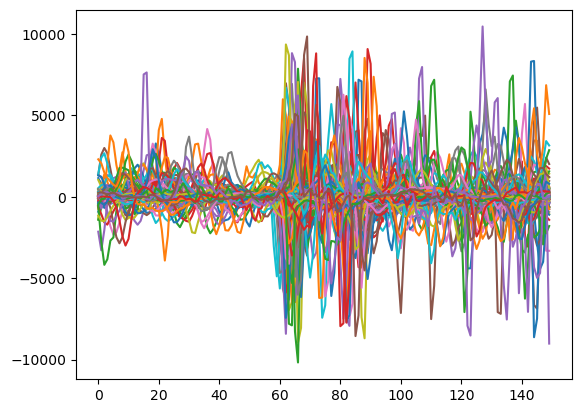

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

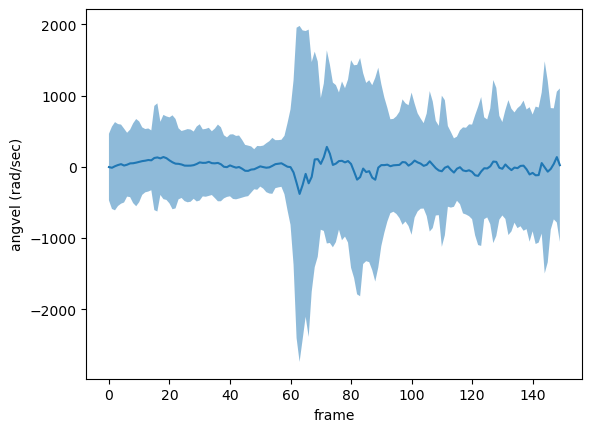

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

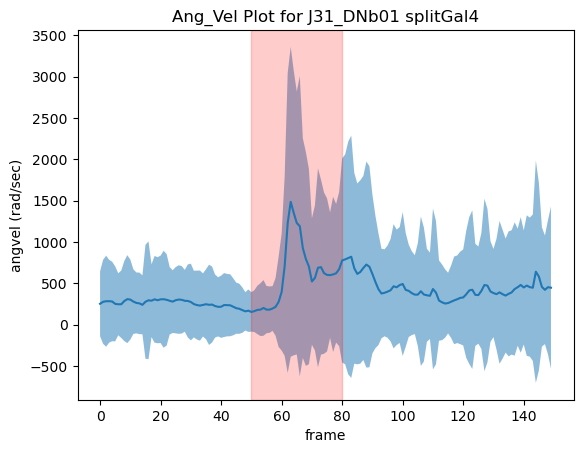

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J31_DNb01 splitGal4")
plt.show()

In [8]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241210_140025.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241210_140025.braidz using pyarrow


In [9]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    96052  1.733836e+09  0.110656  0.025840  0.113201   
 1             0    96053  1.733836e+09  0.110569  0.024798  0.113295   
 2             0    96054  1.733836e+09  0.110646  0.023683  0.113677   
 3             0    96055  1.733836e+09  0.110466  0.022728  0.113696   
 4             0    96056  1.733836e+09  0.110505  0.021584  0.114033   
 ...         ...      ...           ...       ...       ...       ...   
 5370438   57865  7642678  1.733911e+09 -0.074399 -0.184797  0.315044   
 5370439   57865  7642679  1.733911e+09 -0.074276 -0.185232  0.316705   
 5370440   57865  7642680  1.733911e+09 -0.074191 -0.185536  0.318847   
 5370441   57865  7642681  1.733911e+09 -0.074141 -0.185767  0.321551   
 5370442   57865  7642682  1.733911e+09 -0.074062 -0.185797  0.324188   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.010529 -0.096444  0.004224  7.514818e-08

In [10]:
data1 = extract_stimulus_centered_data(df,csvs["opto"])
AngVel_First_Repeat = data1["angular_velocity"]

In [11]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241214_141136.braidz")
df,csvs["opto"]
data2 = extract_stimulus_centered_data(df,csvs["opto"])
AngVel_Third_Repeat = data2["angular_velocity"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241214_141136.braidz using pyarrow


In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the angular velocities with mean and std and adding labels directly
plot_mean_and_std(np.abs(AngVel_First_Repeat), ax=ax, label='First_Repeat (black)', color='black')
plot_mean_and_std(np.abs(AngVel_Second_Repeat), ax=ax, label='Second_Repeat (red)', color='red')
plot_mean_and_std(np.abs(AngVel_Third_Repeat), ax=ax, label='Third_Repeat (blue)', color='blue')
# Adding labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("J59_DNp06 Angular Velocity for Three Repeats")

ax.axvspan(50, 80, color='red', alpha=0.1)

# Adding the legend to identify each curve
ax.legend(title="Experiment Index")

# Show the plot
plt.show()

In [13]:
AngVel_DNp06 = np.concatenate([AngVel_First_Repeat, AngVel_Second_Repeat, AngVel_Third_Repeat])

In [14]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(AngVel_DNp06), ax=ax, label='J59_DNp06_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J59_DNp06 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)


In [15]:
Position = data['position']
print(type(data['position']))



<class 'list'>


In [16]:
outer_length = len(data['position'])
print("Number of elements in the outer list:", outer_length)


Number of elements in the outer list: 146


In [17]:
if outer_length > 0 and isinstance(data['position'][0], list):
    inner_length = len(data['position'][0])
    print("Length of the first inner list:", inner_length)
else:
    print("The list is not nested.")

The list is not nested.


In [18]:
print("Shape of data['position']:", (len(data['position']),))


Shape of data['position']: (146,)


In [19]:
import numpy as np
position_array = np.array(data['position'])
print("Numpy array shape:", position_array.shape)


Numpy array shape: (146, 150, 3)


In [20]:
import numpy as np

# Convert data['position'] to a NumPy array if it's still a list
position_array = np.array(data['position'])

# Now you can slice the data
pre_stimulus = position_array[:, 0:50, :]  # Frames 0 to 49
stimulus = position_array[:, 50:80, :]    # Frames 50 to 79
post_stimulus = position_array[:, 80:150, :]  # Frames 80 to 149

# Print shapes for verification
print("Pre-stimulus shape:", pre_stimulus.shape)
print("Stimulus shape:", stimulus.shape)
print("Post-stimulus shape:", post_stimulus.shape)



Pre-stimulus shape: (146, 50, 3)
Stimulus shape: (146, 30, 3)
Post-stimulus shape: (146, 70, 3)


In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [22]:
# Extract ranges for all recordings
pre_stimulus = position_array[:, 0:50, :]
stimulus = position_array[:, 50:80, :]
post_stimulus = position_array[:, 80:150, :]

# Flatten the data for easy plotting
pre_stimulus_flat = pre_stimulus.reshape(-1, 3)  # (146*50, 3)
stimulus_flat = stimulus.reshape(-1, 3)          # (146*30, 3)
post_stimulus_flat = post_stimulus.reshape(-1, 3)  # (146*70, 3)

# Extract X, Y, Z values
x_pre, y_pre, z_pre = pre_stimulus_flat[:, 0], pre_stimulus_flat[:, 1], pre_stimulus_flat[:, 2]
x_stim, y_stim, z_stim = stimulus_flat[:, 0], stimulus_flat[:, 1], stimulus_flat[:, 2]
x_post, y_post, z_post = post_stimulus_flat[:, 0], post_stimulus_flat[:, 1], post_stimulus_flat[:, 2]


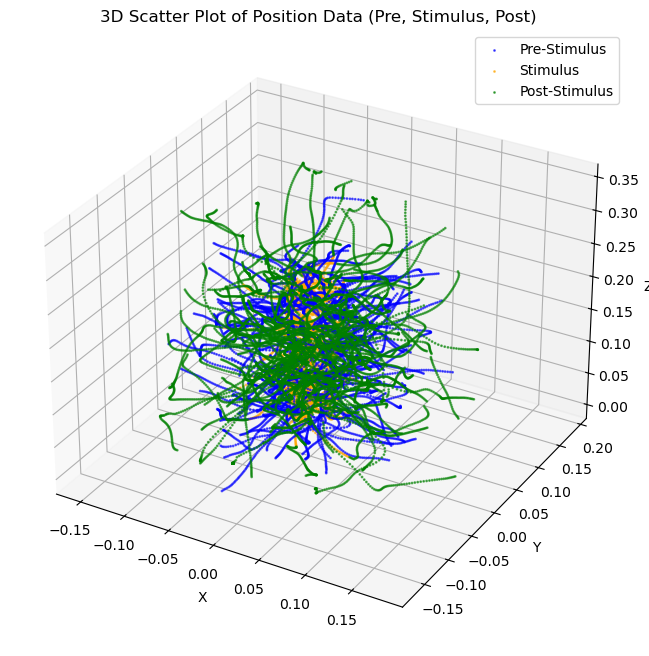

In [23]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each range with different colors
ax.scatter(x_pre, y_pre, z_pre, c='blue', label='Pre-Stimulus', alpha=0.6, s=1)
ax.scatter(x_stim, y_stim, z_stim, c='orange', label='Stimulus', alpha=0.6, s=1)
ax.scatter(x_post, y_post, z_post, c='green', label='Post-Stimulus', alpha=0.6, s=1)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Position Data (Pre, Stimulus, Post)')

# Add legend
ax.legend()

# Show the plot
plt.show()


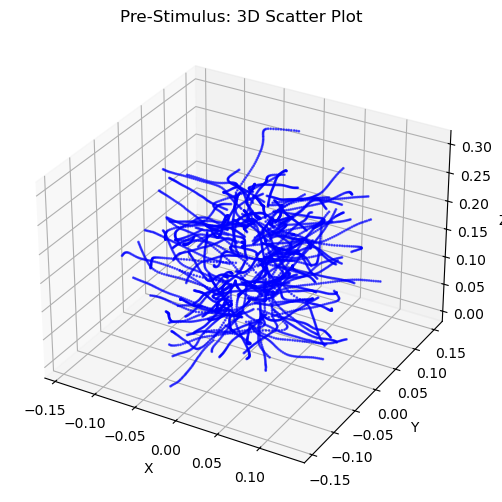

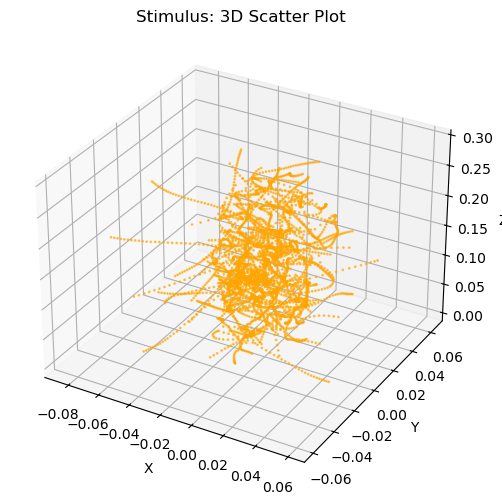

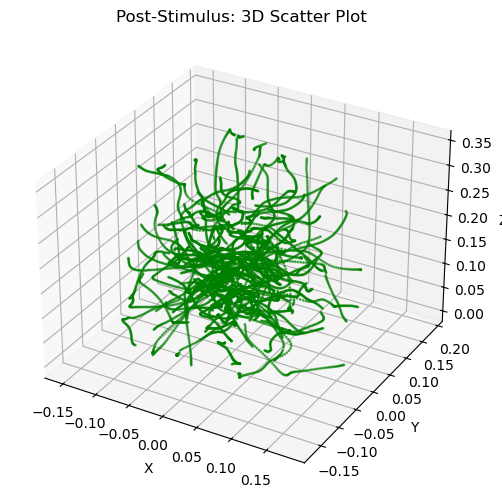

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a separate 3D scatter plot for each range

# Pre-stimulus Plot
fig_pre = plt.figure(figsize=(8, 6))
ax_pre = fig_pre.add_subplot(111, projection='3d')
ax_pre.scatter(x_pre, y_pre, z_pre, c='blue', alpha=0.6, s=1)
ax_pre.set_xlabel('X')
ax_pre.set_ylabel('Y')
ax_pre.set_zlabel('Z')
ax_pre.set_title('Pre-Stimulus: 3D Scatter Plot')
plt.show()

# Stimulus Plot
fig_stim = plt.figure(figsize=(8, 6))
ax_stim = fig_stim.add_subplot(111, projection='3d')
ax_stim.scatter(x_stim, y_stim, z_stim, c='orange', alpha=0.6, s=1)
ax_stim.set_xlabel('X')
ax_stim.set_ylabel('Y')
ax_stim.set_zlabel('Z')
ax_stim.set_title('Stimulus: 3D Scatter Plot')
plt.show()

# Post-stimulus Plot
fig_post = plt.figure(figsize=(8, 6))
ax_post = fig_post.add_subplot(111, projection='3d')
ax_post.scatter(x_post, y_post, z_post, c='green', alpha=0.6, s=1)
ax_post.set_xlabel('X')
ax_post.set_ylabel('Y')
ax_post.set_zlabel('Z')
ax_post.set_title('Post-Stimulus: 3D Scatter Plot')
plt.show()


In [25]:
# Centroid (Mean Position) for each range
centroid_pre = np.mean(pre_stimulus_flat, axis=0)  # Mean of x, y, z
centroid_stim = np.mean(stimulus_flat, axis=0)
centroid_post = np.mean(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Centroid (X, Y, Z): {centroid_pre}")
print(f"Stimulus Centroid (X, Y, Z): {centroid_stim}")
print(f"Post-Stimulus Centroid (X, Y, Z): {centroid_post}")


Pre-Stimulus Centroid (X, Y, Z): [ 0.00412288 -0.0016173   0.14671294]
Stimulus Centroid (X, Y, Z): [-0.00125358 -0.00037916  0.14295701]
Post-Stimulus Centroid (X, Y, Z): [ 0.00128018 -0.002462    0.151238  ]


In [26]:
# Standard deviation for each range
std_pre = np.std(pre_stimulus_flat, axis=0)
std_stim = np.std(stimulus_flat, axis=0)
std_post = np.std(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Standard Deviation (X, Y, Z): {std_pre}")
print(f"Stimulus Standard Deviation (X, Y, Z): {std_stim}")
print(f"Post-Stimulus Standard Deviation (X, Y, Z): {std_post}")


Pre-Stimulus Standard Deviation (X, Y, Z): [0.04828624 0.04807575 0.07421865]
Stimulus Standard Deviation (X, Y, Z): [0.01821737 0.01783003 0.06173584]
Post-Stimulus Standard Deviation (X, Y, Z): [0.05444867 0.05595994 0.0721428 ]


In [27]:
# Maximum distance from centroid
def max_distance_from_centroid(data, centroid):
    distances = np.linalg.norm(data - centroid, axis=1)  # Euclidean distance
    return np.max(distances)

max_dist_pre = max_distance_from_centroid(pre_stimulus_flat, centroid_pre)
max_dist_stim = max_distance_from_centroid(stimulus_flat, centroid_stim)
max_dist_post = max_distance_from_centroid(post_stimulus_flat, centroid_post)

print(f"Pre-Stimulus Maximum Distance from Centroid: {max_dist_pre}")
print(f"Stimulus Maximum Distance from Centroid: {max_dist_stim}")
print(f"Post-Stimulus Maximum Distance from Centroid: {max_dist_post}")


Pre-Stimulus Maximum Distance from Centroid: 0.19488277655452488
Stimulus Maximum Distance from Centroid: 0.14624934186482888
Post-Stimulus Maximum Distance from Centroid: 0.24680650192638104


In [28]:
# Path length for each range
def path_length(data):
    distances = np.linalg.norm(np.diff(data, axis=0), axis=1)  # Summing the distances between consecutive points
    return np.sum(distances)

path_pre = path_length(pre_stimulus_flat)
path_stim = path_length(stimulus_flat)
path_post = path_length(post_stimulus_flat)

print(f"Pre-Stimulus Path Length: {path_pre}")
print(f"Stimulus Path Length: {path_stim}")
print(f"Post-Stimulus Path Length: {path_post}")


Pre-Stimulus Path Length: 34.88499092027517
Stimulus Path Length: 20.200747534556292
Post-Stimulus Path Length: 40.23367097355031


In [29]:
# Normalize path length by range size
path_length_pre_normalized = path_pre / pre_stimulus.shape[1]  # 50 frames
path_length_stim_normalized = path_stim / stimulus.shape[1]    # 30 frames
path_length_post_normalized = path_post / post_stimulus.shape[1]  # 70 frames

print("Normalized Path Lengths (per frame):")
print(f"Pre-Stimulus: {path_length_pre_normalized}")
print(f"Stimulus: {path_length_stim_normalized}")
print(f"Post-Stimulus: {path_length_post_normalized}")


Normalized Path Lengths (per frame):
Pre-Stimulus: 0.6976998184055034
Stimulus: 0.6733582511518764
Post-Stimulus: 0.5747667281935759


In [30]:
def compute_exploration_volume(data):
    x_range = data[:, 0].max() - data[:, 0].min()
    y_range = data[:, 1].max() - data[:, 1].min()
    z_range = data[:, 2].max() - data[:, 2].min()
    return x_range * y_range * z_range

# Compute volumes
volume_pre = compute_exploration_volume(pre_stimulus_flat)
volume_stim = compute_exploration_volume(stimulus_flat)
volume_post = compute_exploration_volume(post_stimulus_flat)

# Normalize path lengths
path_length_pre_vol_normalized = path_pre / volume_pre
path_length_stim_vol_normalized = path_stim/ volume_stim
path_length_post_vol_normalized = path_post / volume_post

print("Volume-Normalized Path Lengths:")
print(f"Pre-Stimulus: {path_length_pre_vol_normalized}")
print(f"Stimulus: {path_length_stim_vol_normalized}")
print(f"Post-Stimulus: {path_length_post_vol_normalized}")


Volume-Normalized Path Lengths:
Pre-Stimulus: 1432.6108732078533
Stimulus: 4045.5877111795535
Post-Stimulus: 991.3731321806363


Path Lengths (Normalized by Frame Count):
Pre-Stimulus: 95.1048
Stimulus: 93.1986
Post-Stimulus: 95.6464


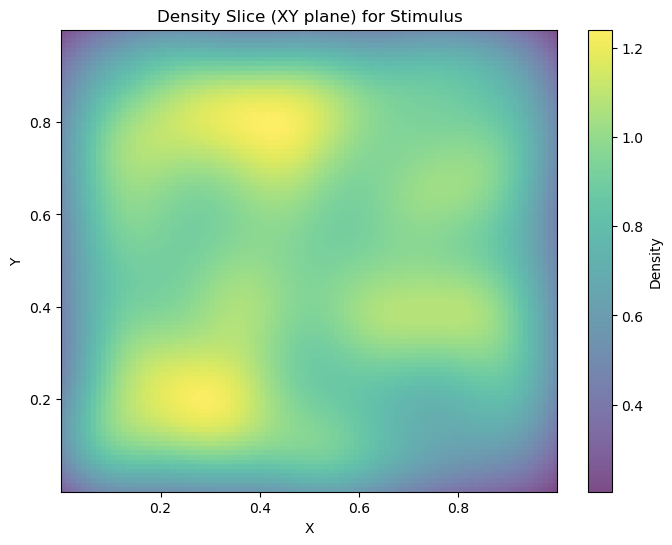

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data for demonstration
# Assuming position_array shape is (146, 150, 3)
np.random.seed(42)  # For reproducibility
position_array = np.random.rand(146, 150, 3)

# Extract ranges for all recordings
pre_stimulus = position_array[:, 0:50, :]
stimulus = position_array[:, 50:80, :]
post_stimulus = position_array[:, 80:150, :]

# Function to compute path length
def compute_path_length(data):
    # Calculate the Euclidean distance between consecutive points
    deltas = np.diff(data, axis=1)  # Shape: (recordings, frames-1, 3)
    distances = np.linalg.norm(deltas, axis=2)  # Shape: (recordings, frames-1)
    return np.sum(distances, axis=1)  # Sum across all frames for each recording

# Calculate path lengths
path_length_pre = np.sum(compute_path_length(pre_stimulus))
path_length_stim = np.sum(compute_path_length(stimulus))
path_length_post = np.sum(compute_path_length(post_stimulus))

# Normalize path lengths by the number of frames in each range
path_length_pre_normalized = path_length_pre / pre_stimulus.shape[1]
path_length_stim_normalized = path_length_stim / stimulus.shape[1]
path_length_post_normalized = path_length_post / post_stimulus.shape[1]

# Print results
print("Path Lengths (Normalized by Frame Count):")
print(f"Pre-Stimulus: {path_length_pre_normalized:.4f}")
print(f"Stimulus: {path_length_stim_normalized:.4f}")
print(f"Post-Stimulus: {path_length_post_normalized:.4f}")

# Flatten data for density analysis
pre_stimulus_flat = pre_stimulus.reshape(-1, 3)
stimulus_flat = stimulus.reshape(-1, 3)
post_stimulus_flat = post_stimulus.reshape(-1, 3)

# Compute density for each range
def compute_density(data, label):
    kde = gaussian_kde(data.T)
    # Generate a grid of points for evaluation
    x_grid, y_grid, z_grid = np.mgrid[
        data[:, 0].min():data[:, 0].max():100j,
        data[:, 1].min():data[:, 1].max():100j,
        data[:, 2].min():data[:, 2].max():100j
    ]
    grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel(), z_grid.ravel()])
    density = kde(grid_coords).reshape(100, 100, 100)

    # Plot slices of the density
    plt.figure(figsize=(8, 6))
    plt.imshow(
        density[:, :, 50],
        extent=[
            data[:, 0].min(), data[:, 0].max(),
            data[:, 1].min(), data[:, 1].max()
        ],
        origin="lower",
        aspect="auto",
        cmap="viridis",
        alpha=0.7
    )
    plt.colorbar(label="Density")
    plt.title(f"Density Slice (XY plane) for {label}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Perform density analysis
compute_density(pre_stimulus_flat, "Pre-Stimulus")
compute_density(stimulus_flat, "Stimulus")
compute_density(post_stimulus_flat, "Post-Stimulus")


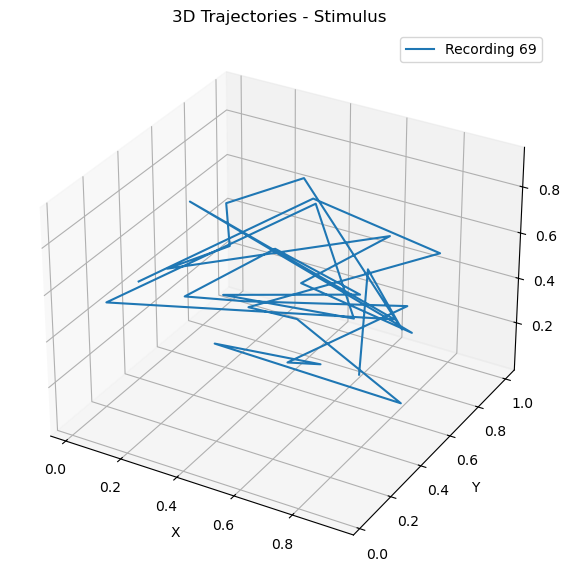

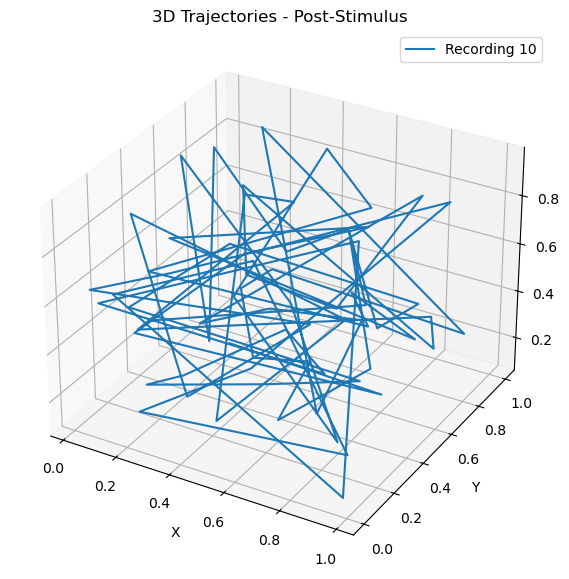

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot trajectories
def plot_trajectory(data, label, num_samples=1):
    """
    Plots 3D trajectories for the given data.
    Args:
        data (numpy.ndarray): Shape (recordings, frames, 3) containing X, Y, Z.
        label (str): Title or label for the plot.
        num_samples (int): Number of random recordings to visualize.
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Randomly sample recordings to plot
    sample_indices = np.random.choice(data.shape[0], size=num_samples, replace=False)
    for idx in sample_indices:
        trajectory = data[idx]  # Shape: (frames, 3)
        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label=f"Recording {idx+1}")
    
    ax.set_title(f"3D Trajectories - {label}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.legend()
    plt.show()

# Plot trajectories for pre-stimulus, stimulus, and post-stimulus
plot_trajectory(pre_stimulus, "Pre-Stimulus", num_samples=1)
plot_trajectory(stimulus, "Stimulus", num_samples=1)
plot_trajectory(post_stimulus, "Post-Stimulus", num_samples=1)


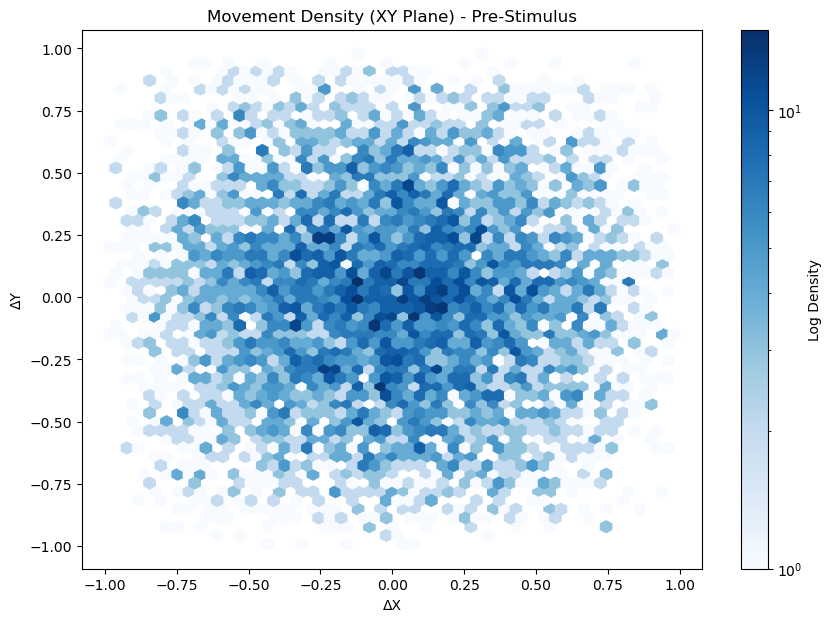

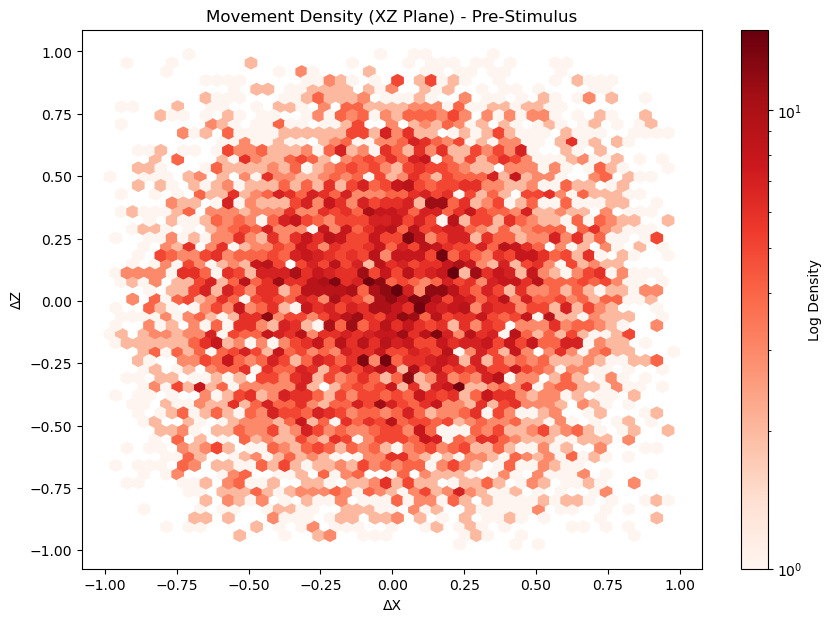

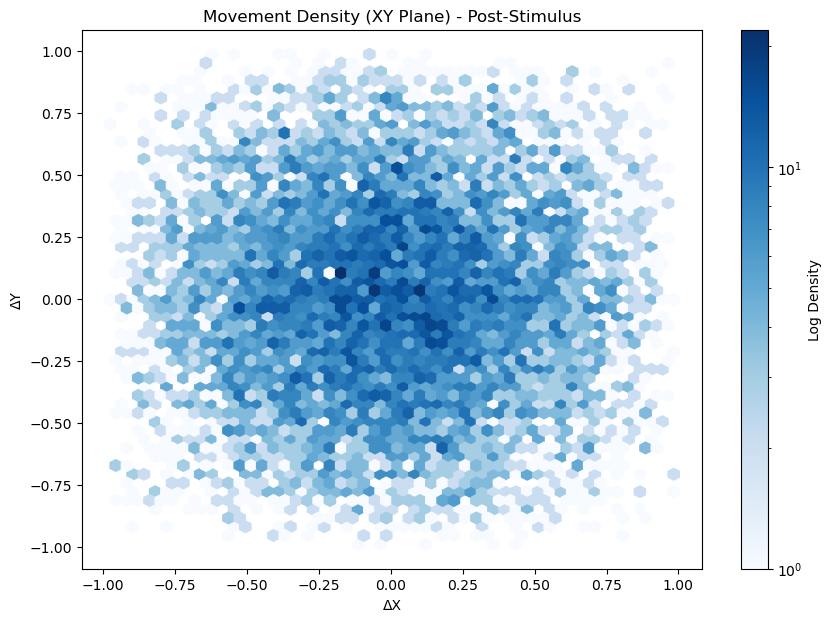

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_blob(data, range_label):
    """
    Creates a blob plot for the given trajectory data by projecting movement onto XY and XZ planes.
    
    Args:
        data (numpy.ndarray): Shape (recordings, frames, 3) containing X, Y, Z.
        range_label (str): Label for the range (e.g., Pre-Stimulus, Stimulus).
    """
    # Calculate movement as the difference between consecutive frames
    diffs = np.diff(data, axis=1)  # Shape: (recordings, frames-1, 3)
    diffs_flat = diffs.reshape(-1, 3)  # Flatten to (all_movements, 3)
    
    # Extract X, Y, Z displacements
    dx, dy, dz = diffs_flat[:, 0], diffs_flat[:, 1], diffs_flat[:, 2]
    
    # Create a 2D histogram (blob plot) for XY plane
    plt.figure(figsize=(10, 7))
    plt.hexbin(dx, dy, gridsize=50, cmap="Blues", bins="log")
    plt.colorbar(label="Log Density")
    plt.title(f"Movement Density (XY Plane) - {range_label}")
    plt.xlabel("ΔX")
    plt.ylabel("ΔY")
    plt.show()
    
    # Create a 2D histogram for XZ plane
    plt.figure(figsize=(10, 7))
    plt.hexbin(dx, dz, gridsize=50, cmap="Reds", bins="log")
    plt.colorbar(label="Log Density")
    plt.title(f"Movement Density (XZ Plane) - {range_label}")
    plt.xlabel("ΔX")
    plt.ylabel("ΔZ")
    plt.show()

# Apply the function for each range
plot_blob(pre_stimulus, "Pre-Stimulus")
plot_blob(stimulus, "Stimulus")
plot_blob(post_stimulus, "Post-Stimulus")


In [34]:
# Function to normalize path lengths
def compute_normalized_path_length(data, num_frames):
    """
    Computes total and per-frame normalized path length.
    
    Args:
        data (numpy.ndarray): Shape (recordings, frames, 3) containing X, Y, Z.
        num_frames (int): Total number of frames for the range.
        
    Returns:
        total_length (float): Total path length.
        per_frame_length (float): Path length normalized by frame count.
    """
    diffs = np.diff(data, axis=1)  # Frame-to-frame differences
    distances = np.linalg.norm(diffs, axis=2)  # Euclidean distance for each frame-to-frame transition
    total_length = np.sum(distances)
    per_frame_length = total_length / num_frames
    return total_length, per_frame_length

# Example for Pre-Stimulus
pre_total, pre_per_frame = compute_normalized_path_length(pre_stimulus, pre_stimulus.shape[1])
stim_total, stim_per_frame = compute_normalized_path_length(stimulus, stimulus.shape[1])
post_total, post_per_frame = compute_normalized_path_length(post_stimulus, post_stimulus.shape[1])

print(f"Pre-Stimulus Path Length: Total = {pre_total}, Per-Frame = {pre_per_frame}")
print(f"Stimulus Path Length: Total = {stim_total}, Per-Frame = {stim_per_frame}")
print(f"Post-Stimulus Path Length: Total = {post_total}, Per-Frame = {post_per_frame}")


Pre-Stimulus Path Length: Total = 4755.240351574114, Per-Frame = 95.10480703148228
Stimulus Path Length: Total = 2795.9581723223146, Per-Frame = 93.19860574407716
Post-Stimulus Path Length: Total = 6695.246370233115, Per-Frame = 95.64637671761594


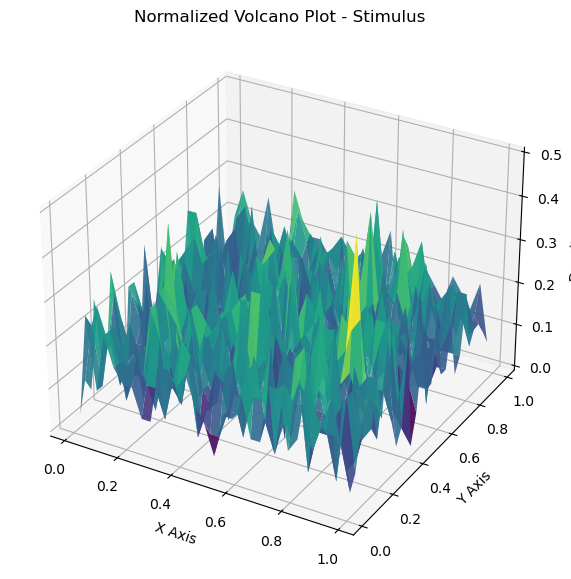

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_normalized_volcano(data, range_label, num_frames, grid_size=30):
    """
    Creates a normalized volcano plot for movement density.
    
    Args:
        data (numpy.ndarray): Shape (recordings, frames, 3) containing X, Y, Z positions.
        range_label (str): Label for the range (e.g., Pre-Stimulus, Stimulus).
        num_frames (int): Total number of frames for the range.
        grid_size (int): Size of the grid for density calculation.
    """
    # Flatten data
    flattened_data = data.reshape(-1, 3)
    x, y, z = flattened_data[:, 0], flattened_data[:, 1], flattened_data[:, 2]

    # Calculate 3D histogram (density)
    hist, edges = np.histogramdd(flattened_data, bins=grid_size, density=False)
    
    # Normalize density by the number of frames
    hist_normalized = hist / num_frames
    
    # Extract bin centers for plotting
    x_centers = (edges[0][:-1] + edges[0][1:]) / 2
    y_centers = (edges[1][:-1] + edges[1][1:]) / 2
    z_centers = (edges[2][:-1] + edges[2][1:]) / 2
    X, Y = np.meshgrid(x_centers, y_centers)
    Z = np.sum(hist_normalized, axis=2).T  # Sum along Z-axis to project density onto XY plane

    # Create a volcano plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
    ax.set_title(f"Normalized Volcano Plot - {range_label}")
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Density")
    plt.show()

# Example for each range
plot_normalized_volcano(pre_stimulus, "Pre-Stimulus", pre_stimulus.shape[1])
plot_normalized_volcano(stimulus, "Stimulus", stimulus.shape[1])
plot_normalized_volcano(post_stimulus, "Post-Stimulus", post_stimulus.shape[1])


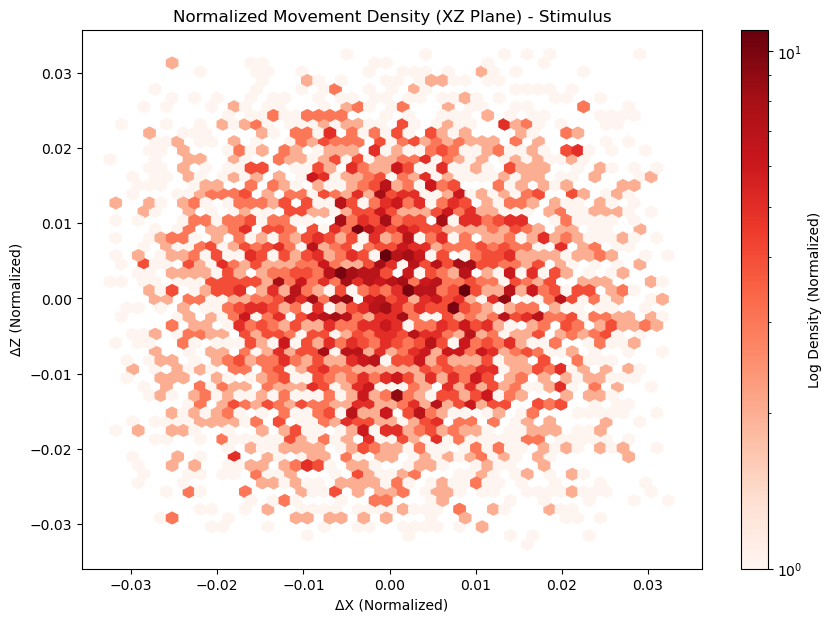

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_blob_normalized(data, range_label, num_frames):
    """
    Creates a normalized blob plot for the given trajectory data by projecting movement onto XY and XZ planes.
    
    Args:
        data (numpy.ndarray): Shape (recordings, frames, 3) containing X, Y, Z.
        range_label (str): Label for the range (e.g., Pre-Stimulus, Stimulus).
        num_frames (int): Total number of frames in the range, used for normalization.
    """
    # Calculate movement as the difference between consecutive frames
    diffs = np.diff(data, axis=1)  # Shape: (recordings, frames-1, 3)
    diffs_flat = diffs.reshape(-1, 3)  # Flatten to (all_movements, 3)
    
    # Extract X, Y, Z displacements
    dx, dy, dz = diffs_flat[:, 0], diffs_flat[:, 1], diffs_flat[:, 2]
    
    # Normalize displacements by the total number of frames
    dx_normalized = dx / num_frames
    dy_normalized = dy / num_frames
    dz_normalized = dz / num_frames
    
    # Create a 2D histogram (blob plot) for XY plane
    plt.figure(figsize=(10, 7))
    plt.hexbin(dx_normalized, dy_normalized, gridsize=50, cmap="Blues", bins="log")
    plt.colorbar(label="Log Density (Normalized)")
    plt.title(f"Normalized Movement Density (XY Plane) - {range_label}")
    plt.xlabel("ΔX (Normalized)")
    plt.ylabel("ΔY (Normalized)")
    plt.show()
    
    # Create a 2D histogram for XZ plane
    plt.figure(figsize=(10, 7))
    plt.hexbin(dx_normalized, dz_normalized, gridsize=50, cmap="Reds", bins="log")
    plt.colorbar(label="Log Density (Normalized)")
    plt.title(f"Normalized Movement Density (XZ Plane) - {range_label}")
    plt.xlabel("ΔX (Normalized)")
    plt.ylabel("ΔZ (Normalized)")
    plt.show()

# Apply the function for each range with normalization
plot_blob_normalized(pre_stimulus, "Pre-Stimulus", pre_stimulus.shape[1])
plot_blob_normalized(stimulus, "Stimulus", stimulus.shape[1])
plot_blob_normalized(post_stimulus, "Post-Stimulus", post_stimulus.shape[1])


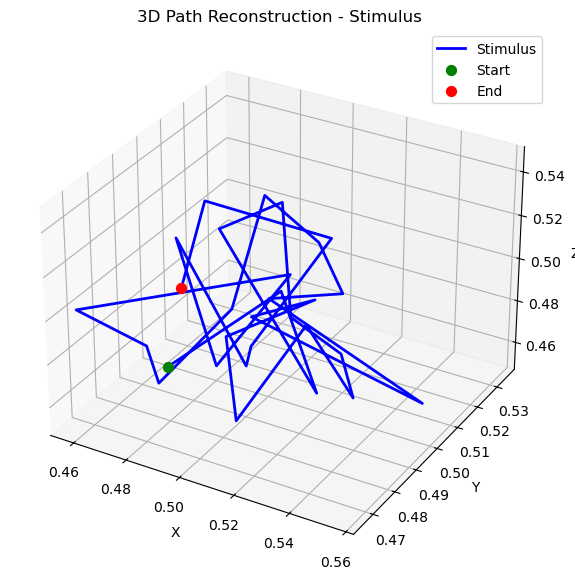

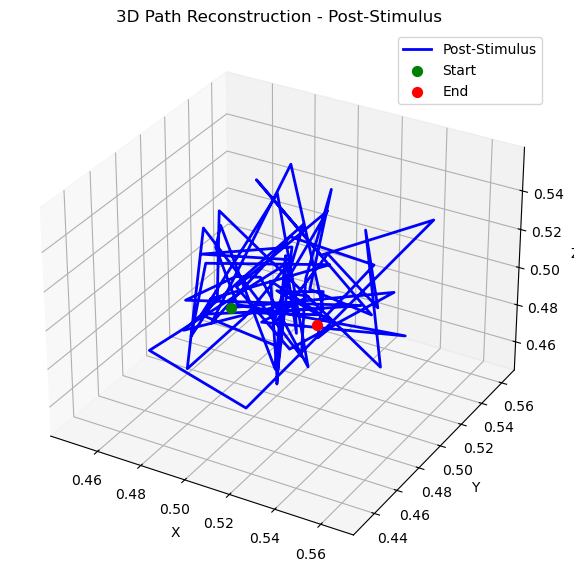

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_path(data, range_label):
    """
    Plots the 3D path for the given trajectory data.

    Args:
        data (numpy.ndarray): Shape (recordings, frames, 3) containing X, Y, Z.
        range_label (str): Label for the range (e.g., Pre-Stimulus, Stimulus).
    """
    # Take the mean path across all recordings for visualization
    mean_path = np.mean(data, axis=0)  # Shape: (frames, 3)
    
    # Extract X, Y, Z values
    x, y, z = mean_path[:, 0], mean_path[:, 1], mean_path[:, 2]
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, label=range_label, lw=2, color='blue')
    ax.scatter(x[0], y[0], z[0], color='green', label='Start', s=50)  # Mark the start
    ax.scatter(x[-1], y[-1], z[-1], color='red', label='End', s=50)   # Mark the end
    
    # Labels and title
    ax.set_title(f"3D Path Reconstruction - {range_label}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

# Apply the function for each range
plot_3d_path(pre_stimulus, "Pre-Stimulus")
plot_3d_path(stimulus, "Stimulus")
plot_3d_path(post_stimulus, "Post-Stimulus")


In [42]:
Angular_Velocity = data["angular_velocity"]
type(Angular_Velocity)
print(Angular_Velocity)

[array([ 1.93159738e+02,  1.17932969e+02, -2.18178139e+01, -5.10589328e+00,
        1.20598698e+02,  1.09304993e+02,  1.85365968e+02,  7.40387383e+01,
       -1.06770980e+02, -7.67349629e+01,  7.62004379e+00,  2.65648383e+01,
        3.81760521e+01,  1.69196840e+02,  2.21835094e+02,  2.82360926e+02,
        5.37778946e+02,  1.09137331e+03,  2.30218844e+03,  3.27076865e+03,
        2.62941365e+03,  1.53955109e+03,  8.87116530e+02,  3.88190952e+02,
       -1.71483450e+01, -3.80649752e+02, -5.94260489e+02, -7.71651082e+02,
       -7.11022529e+02, -5.14235161e+02, -3.85669453e+02, -2.56667447e+02,
       -2.32302913e+02, -1.76892975e+02, -9.97414104e+01, -1.70683128e+02,
       -1.56166123e+02, -2.27947135e+02, -2.97922746e+02, -1.30559431e+02,
        1.74950904e+02, -3.00141699e+01, -3.66660738e+02, -1.89411878e+02,
       -4.41195083e+01, -3.21319839e+01, -6.07804178e+01, -5.45693168e+01,
       -7.99920114e+01, -1.86311692e+01,  2.37256404e+01, -9.37145680e+01,
       -1.57122751e+02, 

In [39]:
AV_Array = np.array(Angular_Velocity)
print("Numpy array shape:", AV_Array.shape)



Numpy array shape: (146, 150)
AV_Array


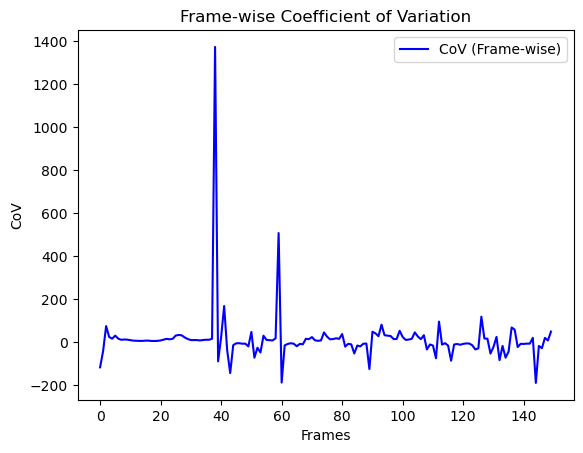

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Coefficient of Variation (CoV)
mean_values = np.mean(AV_Array, axis=0)
std_dev = np.std(AV_Array, axis=0)
coeff_variation = std_dev / mean_values

# Plot CoV
plt.plot(coeff_variation, label="CoV (Frame-wise)", color='blue')
plt.title("Frame-wise Coefficient of Variation")
plt.xlabel("Frames")
plt.ylabel("CoV")
plt.legend()
plt.show()


In [44]:
# Calculate peaks for each recording
peaks = np.max(AV_Array, axis=1)

# Histogram of peaks
plt.hist(peaks, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Peak Angular Velocity Distribution")
plt.xlabel("Peak Angular Velocity")
plt.ylabel("Frequency")
plt.show()


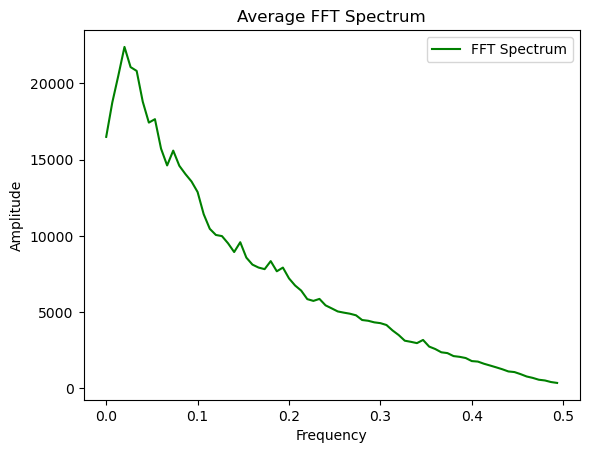

In [45]:
# Perform FFT for each recording
frequencies = np.fft.fftfreq(AV_Array.shape[1])  # Frequencies
fft_results = np.fft.fft(AV_Array, axis=1)  # FFT values

# Mean spectrum across recordings
mean_spectrum = np.mean(np.abs(fft_results), axis=0)

# Plot the average spectrum
plt.plot(frequencies[:frequencies.size // 2], mean_spectrum[:frequencies.size // 2], label="FFT Spectrum", color='green')
plt.title("Average FFT Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


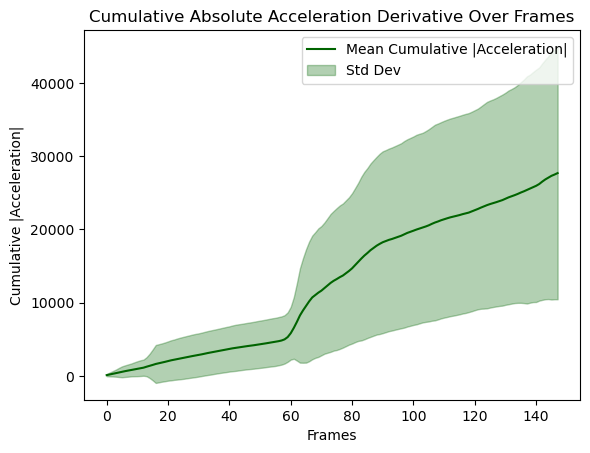

In [47]:
# Use absolute values for angular velocities and derivatives
abs_AV_Array = np.abs(AV_Array)
abs_velocity_derivative = np.abs(np.diff(abs_AV_Array, axis=1))
abs_acceleration_derivative = np.abs(np.diff(abs_velocity_derivative, axis=1))

# Cumulative sum of absolute acceleration derivative
cumulative_abs_acceleration = np.cumsum(abs_acceleration_derivative, axis=1)

# Mean and standard deviation of cumulative absolute acceleration
mean_cumulative_abs_acceleration = np.mean(cumulative_abs_acceleration, axis=0)
std_cumulative_abs_acceleration = np.std(cumulative_abs_acceleration, axis=0)

# Plot cumulative absolute acceleration
plt.plot(mean_cumulative_abs_acceleration, label="Mean Cumulative |Acceleration|", color='darkgreen')
plt.fill_between(range(cumulative_abs_acceleration.shape[1]), 
                 mean_cumulative_abs_acceleration - std_cumulative_abs_acceleration, 
                 mean_cumulative_abs_acceleration + std_cumulative_abs_acceleration, 
                 color='darkgreen', alpha=0.3, label="Std Dev")
plt.title("Cumulative Absolute Acceleration Derivative Over Frames")
plt.xlabel("Frames")
plt.ylabel("Cumulative |Acceleration|")
plt.legend()
plt.show()


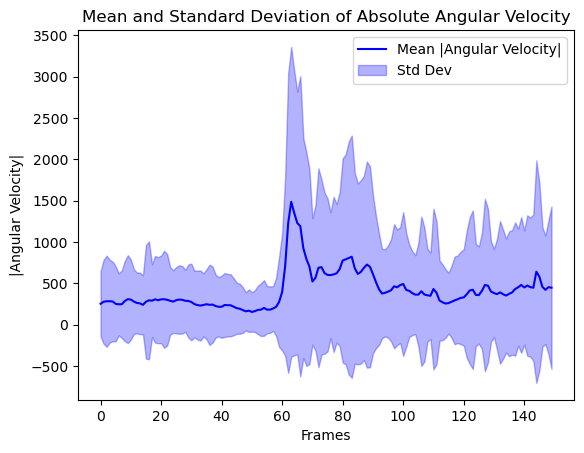

In [48]:
# Mean and standard deviation of absolute angular velocity
mean_abs_velocity = np.mean(abs_AV_Array, axis=0)
std_abs_velocity = np.std(abs_AV_Array, axis=0)

plt.plot(mean_abs_velocity, label="Mean |Angular Velocity|", color='blue')
plt.fill_between(range(abs_AV_Array.shape[1]), 
                 mean_abs_velocity - std_abs_velocity, 
                 mean_abs_velocity + std_abs_velocity, 
                 color='blue', alpha=0.3, label="Std Dev")
plt.title("Mean and Standard Deviation of Absolute Angular Velocity")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity|")
plt.legend()
plt.show()


In [49]:
# Mean and standard deviation of absolute derivatives
mean_abs_velocity_derivative = np.mean(abs_velocity_derivative, axis=0)
std_abs_velocity_derivative = np.std(abs_velocity_derivative, axis=0)

plt.plot(mean_abs_velocity_derivative, label="Mean |Angular Velocity Derivative|", color='purple')
plt.fill_between(range(abs_velocity_derivative.shape[1]), 
                 mean_abs_velocity_derivative - std_abs_velocity_derivative, 
                 mean_abs_velocity_derivative + std_abs_velocity_derivative, 
                 color='purple', alpha=0.3, label="Std Dev")
plt.title("Mean and Standard Deviation of Absolute Angular Velocity Derivative")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity Derivative|")
plt.legend()
plt.show()


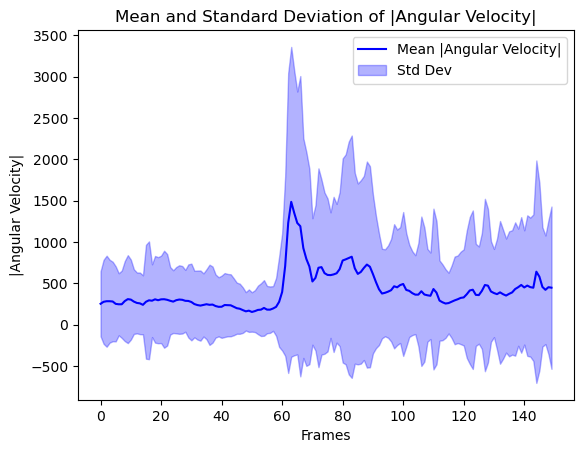

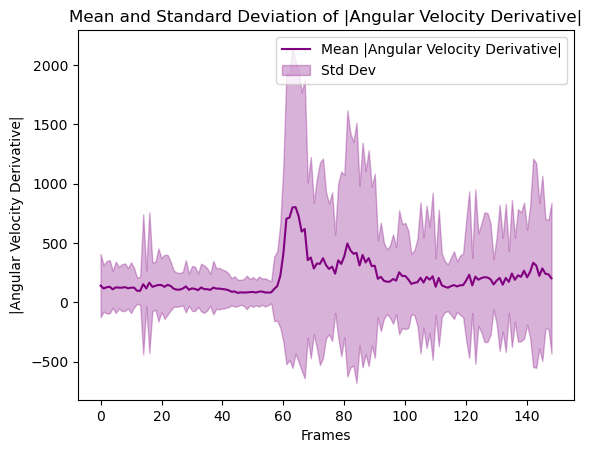

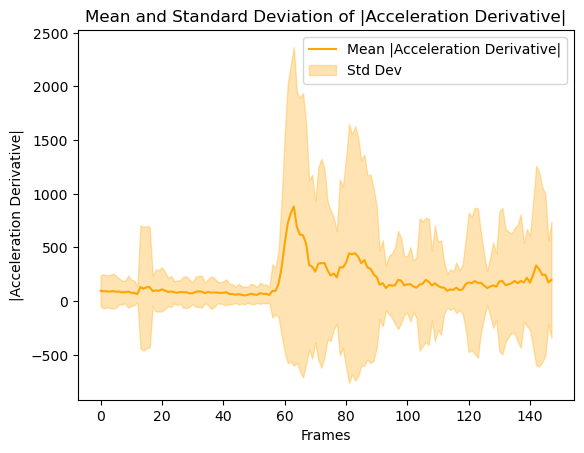

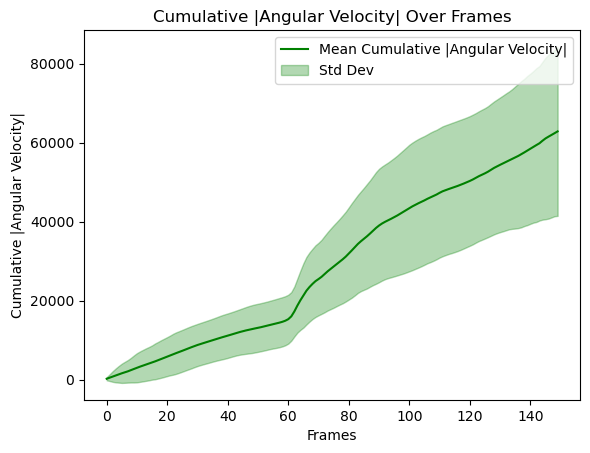

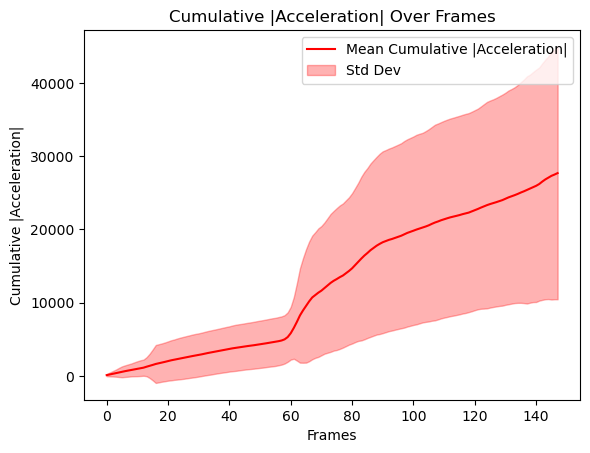

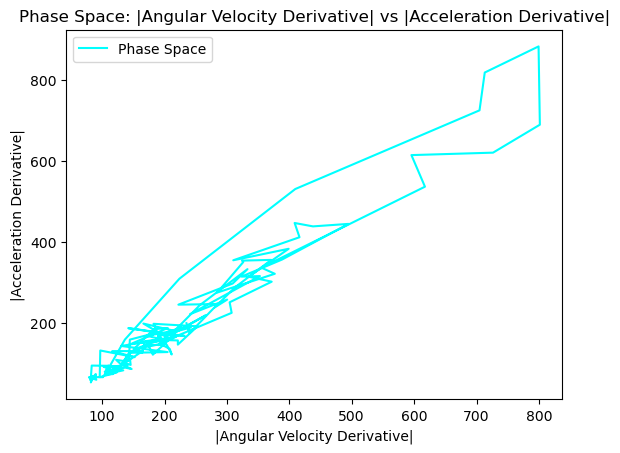

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming AV_Array is the numpy array containing angular velocity data
AV_Array = np.abs(np.array(Angular_Velocity))  # Take absolute values at the start

# Compute derivatives (angular velocity -> acceleration)
velocity_derivative = np.diff(AV_Array, axis=1)  # First derivative
velocity_derivative = np.abs(velocity_derivative)  # Take absolute values

acceleration_derivative = np.diff(velocity_derivative, axis=1)  # Second derivative
acceleration_derivative = np.abs(acceleration_derivative)  # Take absolute values

# Cumulative values
cumulative_velocity = np.cumsum(AV_Array, axis=1)  # Cumulative angular velocity
cumulative_acceleration = np.cumsum(acceleration_derivative, axis=1)  # Cumulative acceleration

# Mean and standard deviation of angular velocity
mean_velocity = np.mean(AV_Array, axis=0)
std_velocity = np.std(AV_Array, axis=0)

# Mean and standard deviation of velocity derivative
mean_velocity_derivative = np.mean(velocity_derivative, axis=0)
std_velocity_derivative = np.std(velocity_derivative, axis=0)

# Mean and standard deviation of acceleration derivative
mean_acceleration_derivative = np.mean(acceleration_derivative, axis=0)
std_acceleration_derivative = np.std(acceleration_derivative, axis=0)

# Mean and standard deviation of cumulative values
mean_cumulative_velocity = np.mean(cumulative_velocity, axis=0)
std_cumulative_velocity = np.std(cumulative_velocity, axis=0)

mean_cumulative_acceleration = np.mean(cumulative_acceleration, axis=0)
std_cumulative_acceleration = np.std(cumulative_acceleration, axis=0)

# Plot 1: Mean and standard deviation of angular velocity
plt.figure()
plt.plot(mean_velocity, label="Mean |Angular Velocity|", color='blue')
plt.fill_between(range(AV_Array.shape[1]), 
                 mean_velocity - std_velocity, 
                 mean_velocity + std_velocity, 
                 color='blue', alpha=0.3, label="Std Dev")
plt.title("Mean and Standard Deviation of |Angular Velocity|")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity|")
plt.legend()
plt.show()

# Plot 2: Mean and standard deviation of velocity derivative
plt.figure()
plt.plot(mean_velocity_derivative, label="Mean |Angular Velocity Derivative|", color='purple')
plt.fill_between(range(velocity_derivative.shape[1]), 
                 mean_velocity_derivative - std_velocity_derivative, 
                 mean_velocity_derivative + std_velocity_derivative, 
                 color='purple', alpha=0.3, label="Std Dev")
plt.title("Mean and Standard Deviation of |Angular Velocity Derivative|")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity Derivative|")
plt.legend()
plt.show()

# Plot 3: Mean and standard deviation of acceleration derivative
plt.figure()
plt.plot(mean_acceleration_derivative, label="Mean |Acceleration Derivative|", color='orange')
plt.fill_between(range(acceleration_derivative.shape[1]), 
                 mean_acceleration_derivative - std_acceleration_derivative, 
                 mean_acceleration_derivative + std_acceleration_derivative, 
                 color='orange', alpha=0.3, label="Std Dev")
plt.title("Mean and Standard Deviation of |Acceleration Derivative|")
plt.xlabel("Frames")
plt.ylabel("|Acceleration Derivative|")
plt.legend()
plt.show()

# Plot 4: Cumulative |Angular Velocity|
plt.figure()
plt.plot(mean_cumulative_velocity, label="Mean Cumulative |Angular Velocity|", color='green')
plt.fill_between(range(cumulative_velocity.shape[1]), 
                 mean_cumulative_velocity - std_cumulative_velocity, 
                 mean_cumulative_velocity + std_cumulative_velocity, 
                 color='green', alpha=0.3, label="Std Dev")
plt.title("Cumulative |Angular Velocity| Over Frames")
plt.xlabel("Frames")
plt.ylabel("Cumulative |Angular Velocity|")
plt.legend()
plt.show()

# Plot 5: Cumulative |Acceleration|
plt.figure()
plt.plot(mean_cumulative_acceleration, label="Mean Cumulative |Acceleration|", color='red')
plt.fill_between(range(cumulative_acceleration.shape[1]), 
                 mean_cumulative_acceleration - std_cumulative_acceleration, 
                 mean_cumulative_acceleration + std_cumulative_acceleration, 
                 color='red', alpha=0.3, label="Std Dev")
plt.title("Cumulative |Acceleration| Over Frames")
plt.xlabel("Frames")
plt.ylabel("Cumulative |Acceleration|")
plt.legend()
plt.show()

# Plot 6: Phase space analysis (|Angular Velocity Derivative| vs |Acceleration Derivative|)
mean_phase_velocity_derivative = np.mean(velocity_derivative[:, :-1], axis=0)  # Match length
mean_phase_acceleration_derivative = np.mean(acceleration_derivative, axis=0)

plt.figure()
plt.plot(mean_phase_velocity_derivative, mean_phase_acceleration_derivative, label="Phase Space", color='cyan')
plt.title("Phase Space: |Angular Velocity Derivative| vs |Acceleration Derivative|")
plt.xlabel("|Angular Velocity Derivative|")
plt.ylabel("|Acceleration Derivative|")
plt.legend()
plt.show()


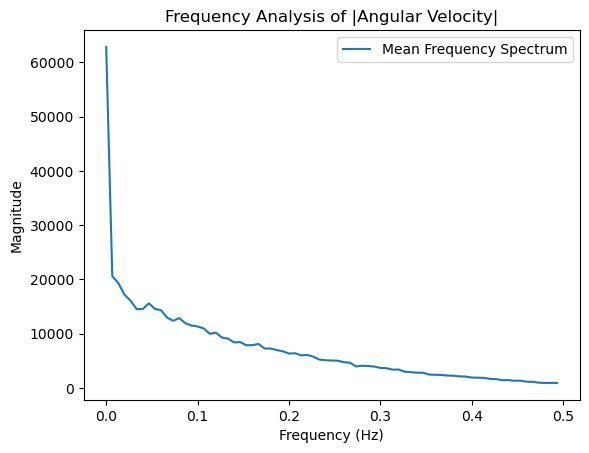

In [52]:
# Fourier Transform (FRT) for frequency analysis
frt_results = np.fft.fft(AV_Array, axis=1)  # Perform FFT along frames
frequencies = np.fft.fftfreq(AV_Array.shape[1])  # Compute frequency bins

# Compute magnitude spectrum
frt_magnitude = np.abs(frt_results)

# Plot mean frequency spectrum
mean_frt_magnitude = np.mean(frt_magnitude, axis=0)
plt.figure()
plt.plot(frequencies[:len(frequencies)//2], mean_frt_magnitude[:len(frequencies)//2], label="Mean Frequency Spectrum")
plt.title("Frequency Analysis of |Angular Velocity|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


Outliers detected: 15
Outlier indices: [  1   5  10  15  61  92  96 100 112 114 122 134 135 141 144]


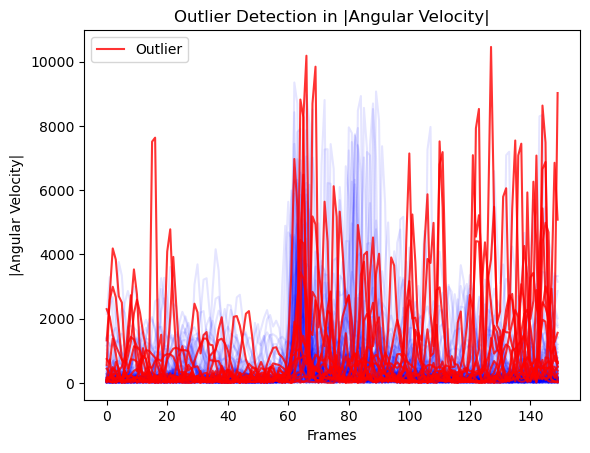

In [53]:
from sklearn.ensemble import IsolationForest

# Flatten recordings to a 2D feature space for each recording
flattened_av = AV_Array.reshape(AV_Array.shape[0], -1)  # Shape: (146, 150)

# Fit Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(flattened_av)  # -1: outlier, 1: inlier

# Analyze outliers
outliers = np.where(outlier_labels == -1)[0]
inliers = np.where(outlier_labels == 1)[0]

print(f"Outliers detected: {len(outliers)}")
print("Outlier indices:", outliers)

# Visualize outliers vs inliers
plt.figure()
for idx in inliers:
    plt.plot(AV_Array[idx, :], color='blue', alpha=0.1)
for idx in outliers:
    plt.plot(AV_Array[idx, :], color='red', alpha=0.8, label="Outlier" if idx == outliers[0] else "")
plt.title("Outlier Detection in |Angular Velocity|")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity|")
plt.legend()
plt.show()


c:\Users\pandey\.conda\envs\flyanalysis-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


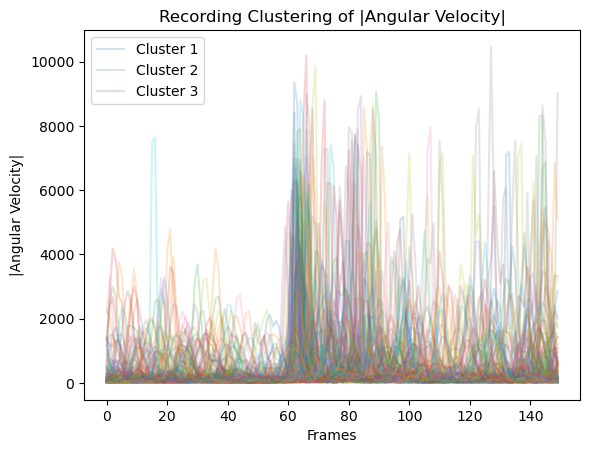

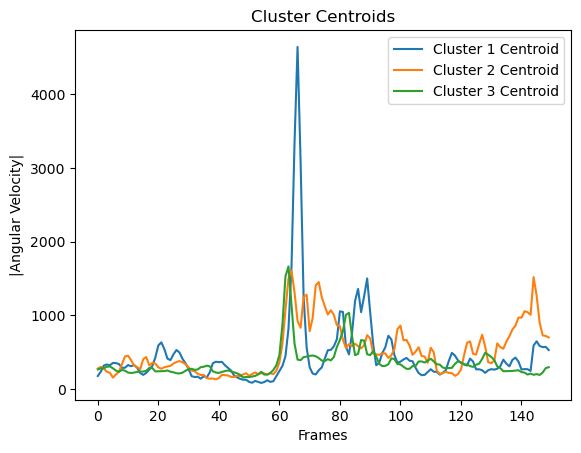

In [54]:
from sklearn.cluster import KMeans

# Perform clustering on flattened recordings
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(flattened_av)

# Visualize clusters
plt.figure()
for cluster in range(n_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    for idx in cluster_indices:
        plt.plot(AV_Array[idx, :], alpha=0.2, label=f"Cluster {cluster + 1}" if idx == cluster_indices[0] else "")
plt.title("Recording Clustering of |Angular Velocity|")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity|")
plt.legend()
plt.show()

# Centroids of each cluster
centroids = kmeans.cluster_centers_
plt.figure()
for cluster in range(n_clusters):
    plt.plot(centroids[cluster], label=f"Cluster {cluster + 1} Centroid")
plt.title("Cluster Centroids")
plt.xlabel("Frames")
plt.ylabel("|Angular Velocity|")
plt.legend()
plt.show()


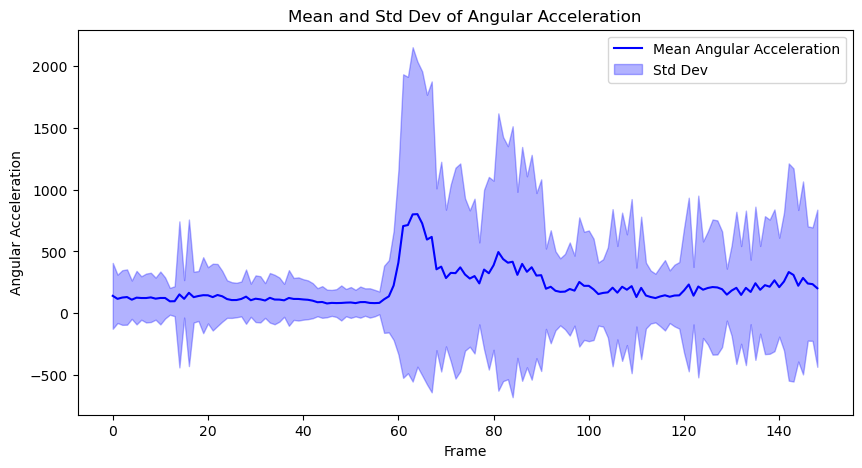

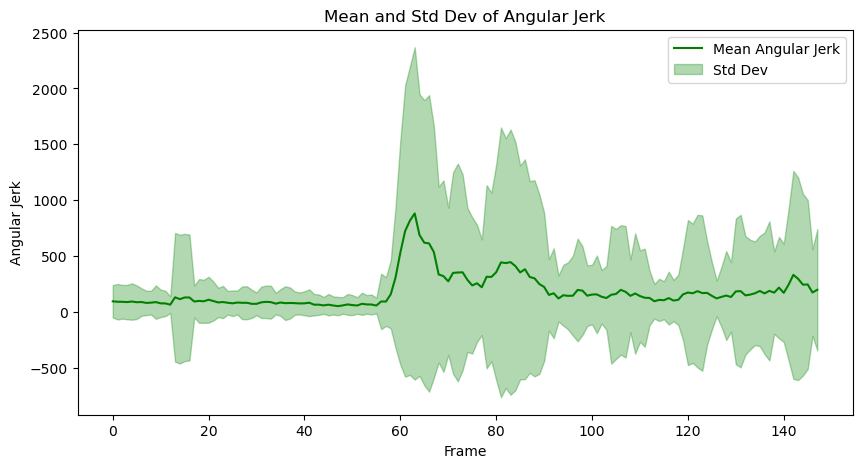

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming AV_Array is your angular velocity dataset with shape (146, 150)
AV_Array = np.abs(AV_Array)  # Ensure we use absolute values for analysis

# Calculate Angular Acceleration (First Derivative) and take absolute values
angular_acceleration = np.abs(np.diff(AV_Array, axis=1))

# Calculate Angular Jerk (Second Derivative) and take absolute values
angular_jerk = np.abs(np.diff(angular_acceleration, axis=1))

# Mean and Standard Deviation for Angular Acceleration
mean_acceleration = np.mean(angular_acceleration, axis=0)
std_acceleration = np.std(angular_acceleration, axis=0)

# Mean and Standard Deviation for Angular Jerk
mean_jerk = np.mean(angular_jerk, axis=0)
std_jerk = np.std(angular_jerk, axis=0)

# Plot Angular Acceleration
plt.figure(figsize=(10, 5))
plt.plot(mean_acceleration, label="Mean Angular Acceleration", color='blue')
plt.fill_between(range(mean_acceleration.shape[0]),
                 mean_acceleration - std_acceleration,
                 mean_acceleration + std_acceleration,
                 color='blue', alpha=0.3, label="Std Dev")
plt.title("Mean and Std Dev of Angular Acceleration")
plt.xlabel("Frame")
plt.ylabel("Angular Acceleration")
plt.legend()
plt.show()

# Plot Angular Jerk
plt.figure(figsize=(10, 5))
plt.plot(mean_jerk, label="Mean Angular Jerk", color='green')
plt.fill_between(range(mean_jerk.shape[0]),
                 mean_jerk - std_jerk,
                 mean_jerk + std_jerk,
                 color='green', alpha=0.3, label="Std Dev")
plt.title("Mean and Std Dev of Angular Jerk")
plt.xlabel("Frame")
plt.ylabel("Angular Jerk")
plt.legend()
plt.show()


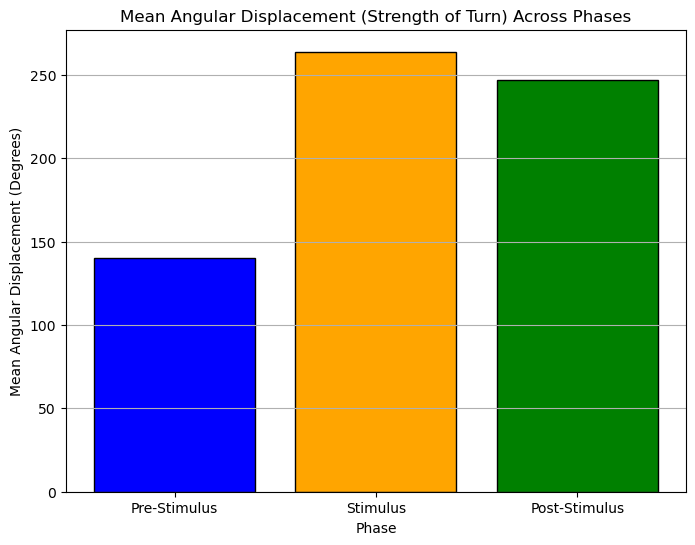

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming AV_Array is your angular velocity dataset with shape (146, 150)
AV_Array = np.abs(AV_Array)  # Ensure we use absolute values for analysis

# Time step (assuming each frame corresponds to one time unit, adjust if needed)
time_step = 1  # Adjust this if there are specific time intervals per frame

# Define the phase frame ranges
pre_stimulus_range = slice(0, 50)
stimulus_range = slice(50, 80)
post_stimulus_range = slice(80, 150)

# Function to normalize and calculate mean angular displacement (strength of turn) for each phase
def normalize_and_calculate_mean_displacement(phase_data, num_frames):
    # Normalize by dividing by the number of frames in the phase
    normalized_data = phase_data / num_frames
    
    # Calculate cumulative displacement (angular rotation in degrees) for each recording
    cumulative_displacement = np.cumsum(normalized_data, axis=1) * time_step  # Cumulative sum over frames
    
    # Total angular displacement (in degrees) during the phase (mean across frames)
    mean_displacement = np.mean(cumulative_displacement, axis=1)  # Mean displacement across all frames in the phase
    
    return mean_displacement

# Apply normalization and calculate mean displacement for each phase
pre_stimulus_displacement = normalize_and_calculate_mean_displacement(AV_Array[:, pre_stimulus_range], 50)
stimulus_displacement = normalize_and_calculate_mean_displacement(AV_Array[:, stimulus_range], 30)
post_stimulus_displacement = normalize_and_calculate_mean_displacement(AV_Array[:, post_stimulus_range], 70)

# Prepare the data for the bar plot
mean_displacements = [
    np.mean(pre_stimulus_displacement),
    np.mean(stimulus_displacement),
    np.mean(post_stimulus_displacement)
]

# Labels for the phases
phases = ["Pre-Stimulus", "Stimulus", "Post-Stimulus"]

# Plotting the bar plot
plt.figure(figsize=(8, 6))

# Bar plot for mean angular displacement
plt.bar(phases, mean_displacements, color=['blue', 'orange', 'green'], edgecolor='black')

# Adding labels and title
plt.title("Mean Angular Displacement (Strength of Turn) Across Phases")
plt.xlabel("Phase")
plt.ylabel("Mean Angular Displacement (Degrees)")
plt.grid(True, axis='y')

# Show the plot
plt.show()


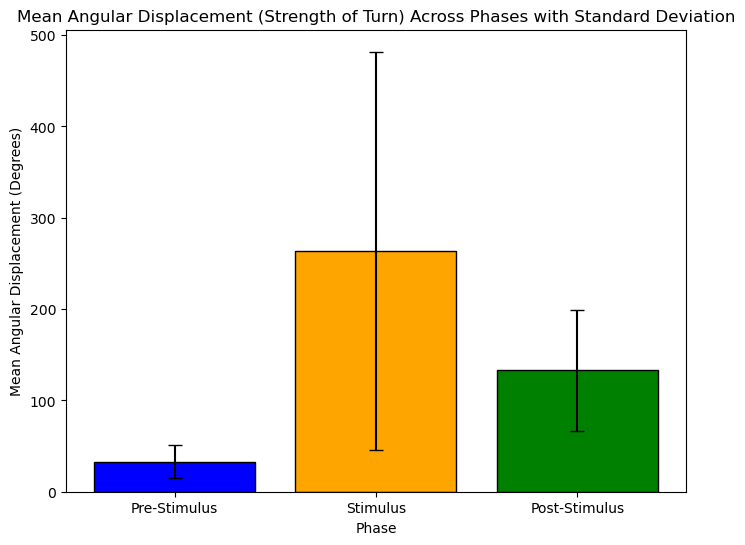

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming AV_Array is your angular velocity dataset with shape (146, 150)
AV_Array = np.abs(AV_Array)  # Ensure we use absolute values for analysis

# Time step (assuming each frame corresponds to one time unit, adjust if needed)
time_step = 1  # Adjust this if there are specific time intervals per frame

# Define the phase frame ranges
pre_stimulus_range = slice(20, 30)
stimulus_range = slice(50, 80)
post_stimulus_range = slice(80, 110)

# Function to normalize and calculate mean angular displacement (strength of turn) and std for each phase
def normalize_and_calculate_mean_displacement_and_std(phase_data, num_frames):
    # Normalize by dividing by the number of frames in the phase
    normalized_data = phase_data / num_frames
    
    # Calculate cumulative displacement (angular rotation in degrees) for each recording
    cumulative_displacement = np.cumsum(normalized_data, axis=1) * time_step  # Cumulative sum over frames
    
    # Total angular displacement (in degrees) during the phase (mean across frames)
    mean_displacement = np.mean(cumulative_displacement, axis=1)  # Mean displacement across all frames in the phase
    std_displacement = np.std(cumulative_displacement, axis=1)  # Standard deviation across all frames in the phase
    
    return mean_displacement, std_displacement

# Apply normalization and calculate mean displacement and standard deviation for each phase
pre_stimulus_displacement, pre_stimulus_std = normalize_and_calculate_mean_displacement_and_std(AV_Array[:, pre_stimulus_range], 50)
stimulus_displacement, stimulus_std = normalize_and_calculate_mean_displacement_and_std(AV_Array[:, stimulus_range], 30)
post_stimulus_displacement, post_stimulus_std = normalize_and_calculate_mean_displacement_and_std(AV_Array[:, post_stimulus_range], 70)

# Prepare the data for the bar plot
mean_displacements = [
    np.mean(pre_stimulus_displacement),
    np.mean(stimulus_displacement),
    np.mean(post_stimulus_displacement)
]

# Prepare the standard deviations for error bars
std_displacements = [
    np.mean(pre_stimulus_std),
    np.mean(stimulus_std),
    np.mean(post_stimulus_std)
]

# Labels for the phases
phases = ["Pre-Stimulus", "Stimulus", "Post-Stimulus"]

# Plotting the bar plot with error bars (standard deviation)
plt.figure(figsize=(8, 6))

# Bar plot for mean angular displacement with error bars for standard deviation
plt.bar(phases, mean_displacements, yerr=std_displacements, capsize=5, color=['blue', 'orange', 'green'], edgecolor='black')

# Adding labels and title
plt.title("Mean Angular Displacement (Strength of Turn) Across Phases with Standard Deviation")
plt.xlabel("Phase")
plt.ylabel("Mean Angular Displacement (Degrees)")

# Show the plot
plt.show()


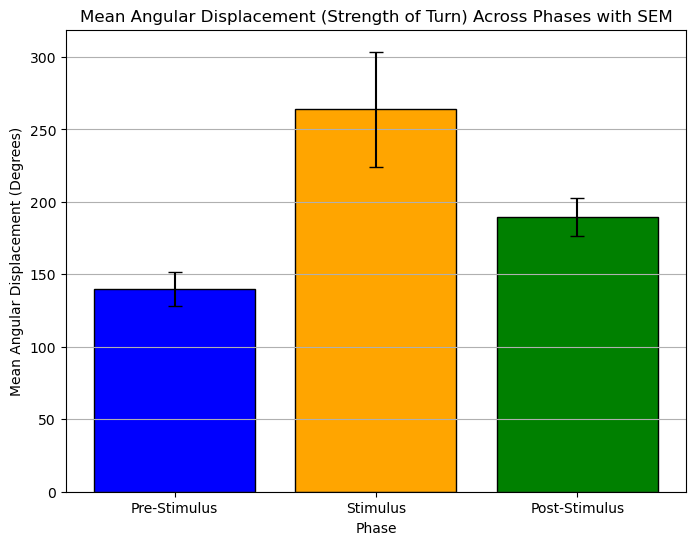

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming AV_Array is your angular velocity dataset with shape (146, 150)
AV_Array = np.abs(AV_Array)  # Ensure we use absolute values for analysis

# Time step (assuming each frame corresponds to one time unit, adjust if needed)
time_step = 1  # Adjust this if there are specific time intervals per frame

# Define the phase frame ranges
pre_stimulus_range = slice(0, 50)
stimulus_range = slice(50, 80)
post_stimulus_range = slice(80, 130)

# Function to normalize and calculate mean angular displacement (strength of turn) and SEM for each phase
def normalize_and_calculate_mean_displacement_and_sem(phase_data, num_frames):
    # Normalize by dividing by the number of frames in the phase
    normalized_data = phase_data / num_frames
    
    # Calculate cumulative displacement (angular rotation in degrees) for each recording
    cumulative_displacement = np.cumsum(normalized_data, axis=1) * time_step  # Cumulative sum over frames
    
    # Total angular displacement (in degrees) during the phase (mean across frames)
    mean_displacement = np.mean(cumulative_displacement, axis=1)  # Mean displacement across all frames in the phase
    sem_displacement = np.std(cumulative_displacement, axis=1) / np.sqrt(cumulative_displacement.shape[1])  # SEM
    
    return mean_displacement, sem_displacement

# Apply normalization and calculate mean displacement and SEM for each phase
pre_stimulus_displacement, pre_stimulus_sem = normalize_and_calculate_mean_displacement_and_sem(AV_Array[:, pre_stimulus_range], 50)
stimulus_displacement, stimulus_sem = normalize_and_calculate_mean_displacement_and_sem(AV_Array[:, stimulus_range], 30)
post_stimulus_displacement, post_stimulus_sem = normalize_and_calculate_mean_displacement_and_sem(AV_Array[:, post_stimulus_range], 70)

# Prepare the data for the bar plot
mean_displacements = [
    np.mean(pre_stimulus_displacement),
    np.mean(stimulus_displacement),
    np.mean(post_stimulus_displacement)
]

# Prepare the standard error of the mean for error bars
sem_displacements = [
    np.mean(pre_stimulus_sem),
    np.mean(stimulus_sem),
    np.mean(post_stimulus_sem)
]

# Labels for the phases
phases = ["Pre-Stimulus", "Stimulus", "Post-Stimulus"]

# Plotting the bar plot with error bars (Standard Error of the Mean)
plt.figure(figsize=(8, 6))

# Bar plot for mean angular displacement with error bars for SEM
plt.bar(phases, mean_displacements, yerr=sem_displacements, capsize=5, color=['blue', 'orange', 'green'], edgecolor='black')

# Adding labels and title
plt.title("Mean Angular Displacement (Strength of Turn) Across Phases with SEM")
plt.xlabel("Phase")
plt.ylabel("Mean Angular Displacement (Degrees)")
plt.grid(True, axis='y')

# Show the plot
plt.show()


ANOVA Results:
                sum_sq     df          F        PR(>F)
C(Phase)  1.136270e+06    2.0  44.616469  2.370703e-18
Residual  5.539184e+06  435.0        NaN           NaN

Tukey HSD Test Results:


C:\Users\pandey\AppData\Local\Temp\ipykernel_9148\3817918123.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1       group2    meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------
Post-Stimulus Pre-Stimulus -49.9321 0.0005 -80.9927 -18.8714   True
Post-Stimulus     Stimulus  74.0496    0.0   42.989 105.1103   True
 Pre-Stimulus     Stimulus 123.9817    0.0  92.9211 155.0423   True
-------------------------------------------------------------------

Normality Tests:
Pre-Stimulus: Stat=0.852, p-value=0.000
Stimulus: Stat=0.979, p-value=0.025
Post-Stimulus: Stat=0.930, p-value=0.000

Cohen's d (Effect Size):
Pre-Stimulus vs Stimulus: -1.082
Stimulus vs Post-Stimulus: 0.590
Pre-Stimulus vs Post-Stimulus: -0.525


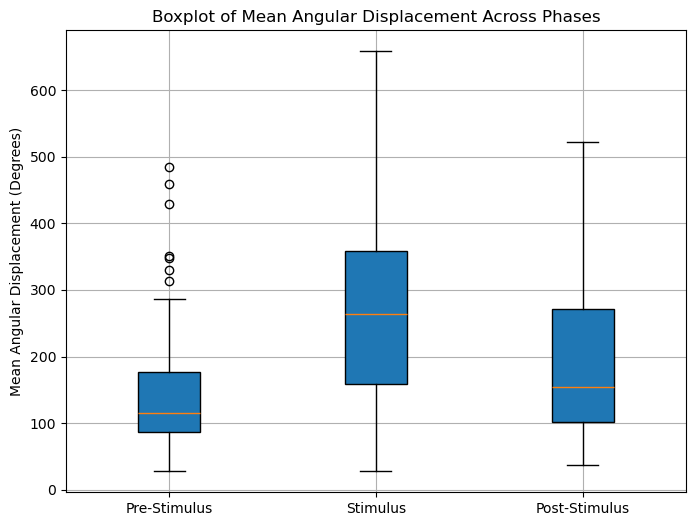

In [76]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Assuming the data (mean displacement values for each phase) is as follows:
data = {
    "Pre-Stimulus": pre_stimulus_displacement,
    "Stimulus": stimulus_displacement,
    "Post-Stimulus": post_stimulus_displacement
}

# Combine the data for statistical analysis
all_data = []
phases = []

for phase, values in data.items():
    all_data.extend(values)
    phases.extend([phase] * len(values))

# One-way ANOVA
anova_data = sm.add_constant(pd.DataFrame({
    "Phase": phases,
    "Displacement": all_data
}))

model = ols("Displacement ~ C(Phase)", data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Check the result of the ANOVA
print("ANOVA Results:")
print(anova_table)

# If ANOVA is significant, perform Tukey's HSD test for pairwise comparisons
if anova_table['PR(>F)'][0] < 0.05:
    print("\nTukey HSD Test Results:")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(all_data, phases, alpha=0.05)
    print(tukey)

# Normality Test (Shapiro-Wilk test) for each group
print("\nNormality Tests:")
for phase, values in data.items():
    stat, p_value = stats.shapiro(values)
    print(f"{phase}: Stat={stat:.3f}, p-value={p_value:.3f}")

# Cohen's d to assess effect size between phases (Pre-Stimulus vs Stimulus, etc.)
def cohen_d(group1, group2):
    """Calculate Cohen's d for two independent samples"""
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1), np.std(group2)
    pooled_std = np.sqrt(((std1**2) + (std2**2)) / 2)
    return (mean1 - mean2) / pooled_std

# Calculate Cohen's d for pairwise comparisons
cohen_d_pre_stimulus_stimulus = cohen_d(pre_stimulus_displacement, stimulus_displacement)
cohen_d_stimulus_post_stimulus = cohen_d(stimulus_displacement, post_stimulus_displacement)
cohen_d_pre_stimulus_post_stimulus = cohen_d(pre_stimulus_displacement, post_stimulus_displacement)

# Print Cohen's d values
print("\nCohen's d (Effect Size):")
print(f"Pre-Stimulus vs Stimulus: {cohen_d_pre_stimulus_stimulus:.3f}")
print(f"Stimulus vs Post-Stimulus: {cohen_d_stimulus_post_stimulus:.3f}")
print(f"Pre-Stimulus vs Post-Stimulus: {cohen_d_pre_stimulus_post_stimulus:.3f}")

# Plotting the data to visually assess distribution
plt.figure(figsize=(8, 6))
plt.boxplot([pre_stimulus_displacement, stimulus_displacement, post_stimulus_displacement],
            labels=["Pre-Stimulus", "Stimulus", "Post-Stimulus"], patch_artist=True)
plt.title("Boxplot of Mean Angular Displacement Across Phases")
plt.ylabel("Mean Angular Displacement (Degrees)")
plt.grid(True)
plt.show()
